In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv('restaurant.env')  # Load environment variables from .env

import os

# Connect to the MySQL database using PyMySQL
conn = pymysql.connect(
    host='localhost',
    user = os.getenv('MY_USERNAME'),
    password = os.getenv('MY_PASSWORD'),
    database='restaurant_db'
    


)
import os


cur = conn.cursor()

# Total Number of Orders for First Quarter of the year 2023 = 5343


In [2]:
query="""Select count(distinct order_id) as Total_Orders from order_details where item_id is not NULL"""
cur.execute(query)
data=cur.fetchall()
data[0][0]

5343

Monday is the first working day of week which is generating most of the sales, then Sunday and Friday respectively.

## Top 5 Selling Items with respect to orders

## Total No. Of Categories

In [3]:
query="""select count(distinct category) from menu_items"""

cur.execute(query)
data=cur.fetchall()
data[0][0]

4

## Total No. Of Items

In [4]:
query= """select count(distinct item_id) as unique_items from order_details where item_id is not NULL"""

cur.execute(query)
data=cur.fetchall()
data[0][0]

32

## Average Orders Per Month

In [5]:
query="""select round(count(distinct order_id)/3,0) as average_order_per_month
 from order_details where item_id is not NULL"""

cur.execute(query)
data=cur.fetchall()
data[0][0]

Decimal('1781')

## Average Price Per Item

In [6]:
query="""select round(avg(price),2) as average_price from menu_items"""

cur.execute(query)
data=cur.fetchall()
data[0][0]

Decimal('13.29')

## Total Number of Orders Per Month

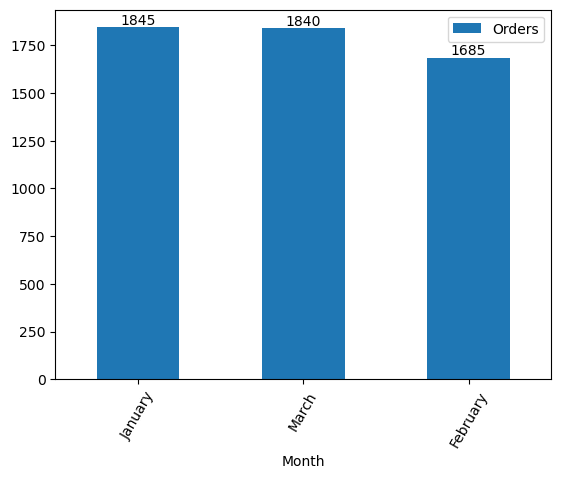

In [7]:
query=""" select monthname(order_date) as months, count(distinct order_id) as orders
 from order_details
 group by months
 order by Orders desc"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Month','Orders'])
ax=df[['Month','Orders']].plot(kind='bar',x='Month',y='Orders')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.show()

## No. of Orders Per Day

   Orders       Days
0     881     Monday
1     792     Sunday
2     784     Friday
3     759    Tuesday
4     739   Thursday
5     708   Saturday
6     680  Wednesday


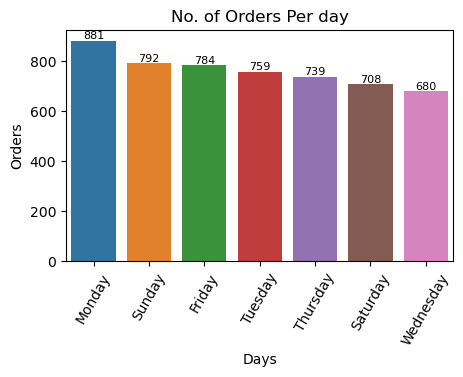

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

query="""select count(distinct order_id) as total_orders, dayname(order_date) as Days
from order_details
where item_id is not NULL
group by Days
order by total_orders desc"""
cur.execute(query)
data=cur.fetchall()
# data
plt.figure(figsize=(5,3))
df=pd.DataFrame(data,columns=['Orders','Days'])
print(df)
ax=sns.barplot(data=df,x='Days',y='Orders')
plt.title('No. of Orders Per day')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0],fontsize=8)
plt.show()

## Peak Hours of the Day with respect to Customer Orders

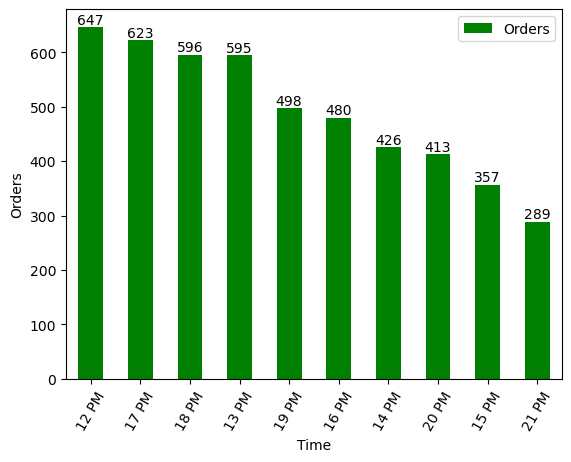

,Time,Orders
0,12 PM,647
1,17 PM,623
2,18 PM,596
3,13 PM,595
4,19 PM,498
5,16 PM,480
6,14 PM,426
7,20 PM,413
8,15 PM,357
9,21 PM,289


In [9]:
query="""select time_format(order_time, '%H %p') as time_of_day, count(distinct order_id) as orders from order_details
group by time_of_day
order by orders desc
limit 10"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Time','Orders'])
ax=df.plot(kind='bar',x='Time',y='Orders',color='green')
plt.xlabel('Time')
plt.ylabel('Orders')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0])
plt.show()
df

Hence, it is concluded that most of the orders are placed in lunch timings i.e. in between 12 PM to 1 PM noon and 
then then after closure of routine office hours i.e. in between 5 PM to 6 PM.

In [10]:
query="""select time_format(order_time, '%H %p') as time_of_day, count(distinct order_id) as orders from order_details
group by time_of_day
order by orders desc
limit 10"""

cur.execute(query)
data=cur.fetchall()
data

(('12 PM', 647),
 ('17 PM', 623),
 ('18 PM', 596),
 ('13 PM', 595),
 ('19 PM', 498),
 ('16 PM', 480),
 ('14 PM', 426),
 ('20 PM', 413),
 ('15 PM', 357),
 ('21 PM', 289))

   Orders             Items
0     596           Edamame
1     595         Hamburger
2     566  Korean Beef Bowl
3     559      Cheeseburger
4     547      French Fries


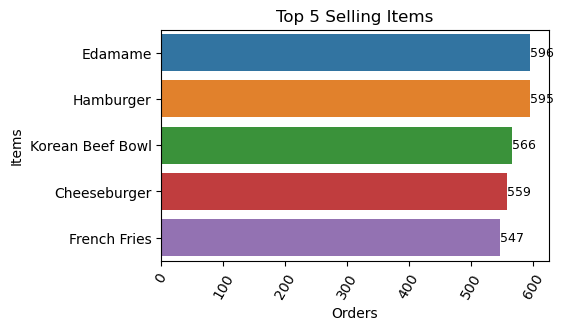

In [11]:
query="""select count(distinct o.order_id) as orders, m.item_name as Popular_items from order_details o join menu_items m
on o.item_id=m.menu_item_id
group by Popular_items
order by orders desc
limit 5"""

cur.execute(query)
data=cur.fetchall()
ax,plt.figure(figsize=(5,3))
df=pd.DataFrame(data,columns=['Orders','Items'])
print(df)
ax=sns.barplot(data=df,x='Orders',y='Items')
plt.title('Top 5 Selling Items')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0],fontsize=9)
plt.show()

Edamame, Hamburger and Korean Beef Bowl are contributing most in generating revenue.

## Top 5 Lowest Selling Items w.r.t Orders

   Orders               Items
0     123       Chicken Tacos
1     201         Potstickers
2     205      Cheese Lasagna
3     211         Steak Tacos
4     229  Cheese Quesadillas


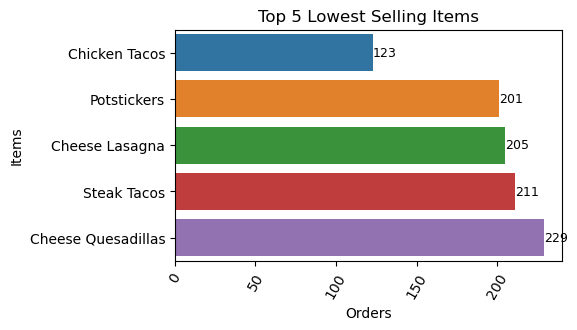

In [12]:
query="""select count(distinct o.order_id) as orders, m.item_name as Popular_items from order_details o join menu_items m
on o.item_id=m.menu_item_id
group by Popular_items
order by orders 
limit 5"""

cur.execute(query)
data=cur.fetchall()
ax,plt.figure(figsize=(5,3))
df=pd.DataFrame(data,columns=['Orders','Items'])
print(df)
ax=sns.barplot(data=df,x='Orders',y='Items')
plt.title('Top 5 Lowest Selling Items')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0],fontsize=9)
plt.show()

## Top Most Selling Item

In [13]:
query="""select count(distinct o.order_id) as orders, m.item_name as Popular_items,round(avg(m.price),2) from order_details o join menu_items m
on o.item_id=m.menu_item_id
group by Popular_items
order by orders desc
limit 1"""

cur.execute(query)
data=cur.fetchall()
data[0]

(596, 'Edamame', Decimal('5.00'))

# Top 5 Highest Priced Items and their Orders

In [14]:
query="""select m.item_name, max(m.price) as maximum_price,count(distinct o.order_id) as orders from order_details o join  
menu_items m on o.item_id=m.menu_item_id
group by item_name
order by maximum_price desc
limit 5"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=['Items','Price','Orders'])
df

,Items,Price,Orders
0,Shrimp Scampi,19.95,235
1,Pork Ramen,17.95,351
2,Meat Lasagna,17.95,266
3,Korean Beef Bowl,17.95,566
4,Chicken Parmesan,17.95,354


Korean Beef Bowl is one of the highest priced item still contributing remakable number of orders.

## Top 5 Lowest Priced Items and their Orders

In [15]:
query="""select m.item_name, min(m.price) as minimum_price, count(distinct o.order_id) as orders from order_details o join  
menu_items m on o.item_id=m.menu_item_id
group by item_name
order by minimum_price 
limit 5"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Items','Price','Orders'])

df

,Items,Price,Orders
0,Edamame,5.00,596
1,French Fries,7.00,547
2,Mac & Cheese,7.00,450
3,Chips & Salsa,7.00,448
4,Hot Dog,9.00,256


Edamame, French Fries, Chips and Salsa are the low priced items having considerable numbers of orders 

## Correlation between Price and Orders

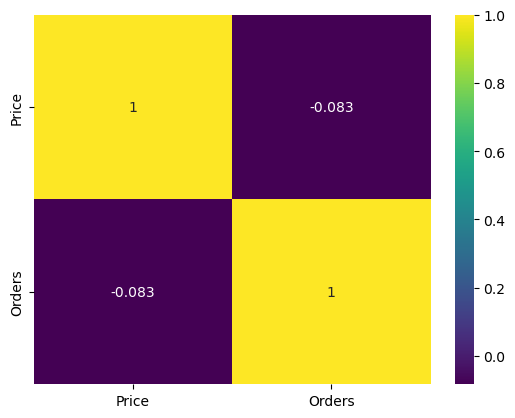

,Items,Orders,Price
0,Edamame,596,5.00
1,Hamburger,595,12.95
2,Korean Beef Bowl,566,17.95
3,Cheeseburger,559,13.95
4,French Fries,547,7.00
5,Tofu Pad Thai,542,14.50
6,Steak Torta,471,13.95
7,Spaghetti & Meatballs,460,17.95
8,Orange Chicken,456,16.50
9,Mac & Cheese,450,7.00


In [16]:
query="""select m.item_name as items,count(distinct o.order_id) as orders, round(avg(m.price),2) as price
from order_details o join menu_items m on o.item_id=m.menu_item_id
group by m.item_name
order by orders desc"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Items','Orders','Price'])
df
corr_matr=df[['Price','Orders']].corr()
sns.heatmap(corr_matr,annot=True,cmap='viridis')
plt.show()
df

There is no correlation between the prices of items and their orders as the value of correlation is neither closer to positive 1 nor to negative 1. 
There are items with highest prices and significant amount of orders and there are items with low prices but still less amount of orders.